In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

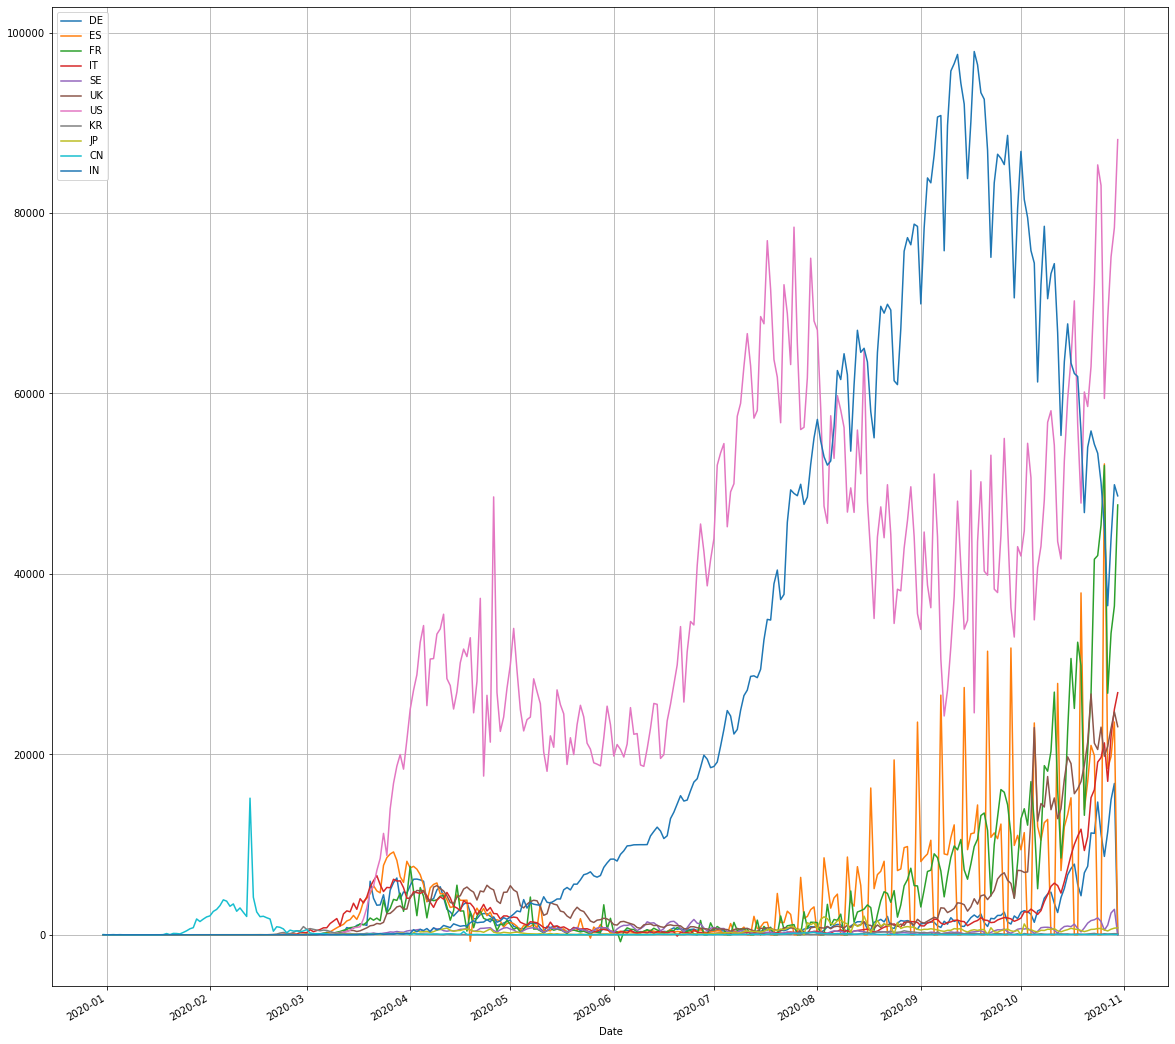

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

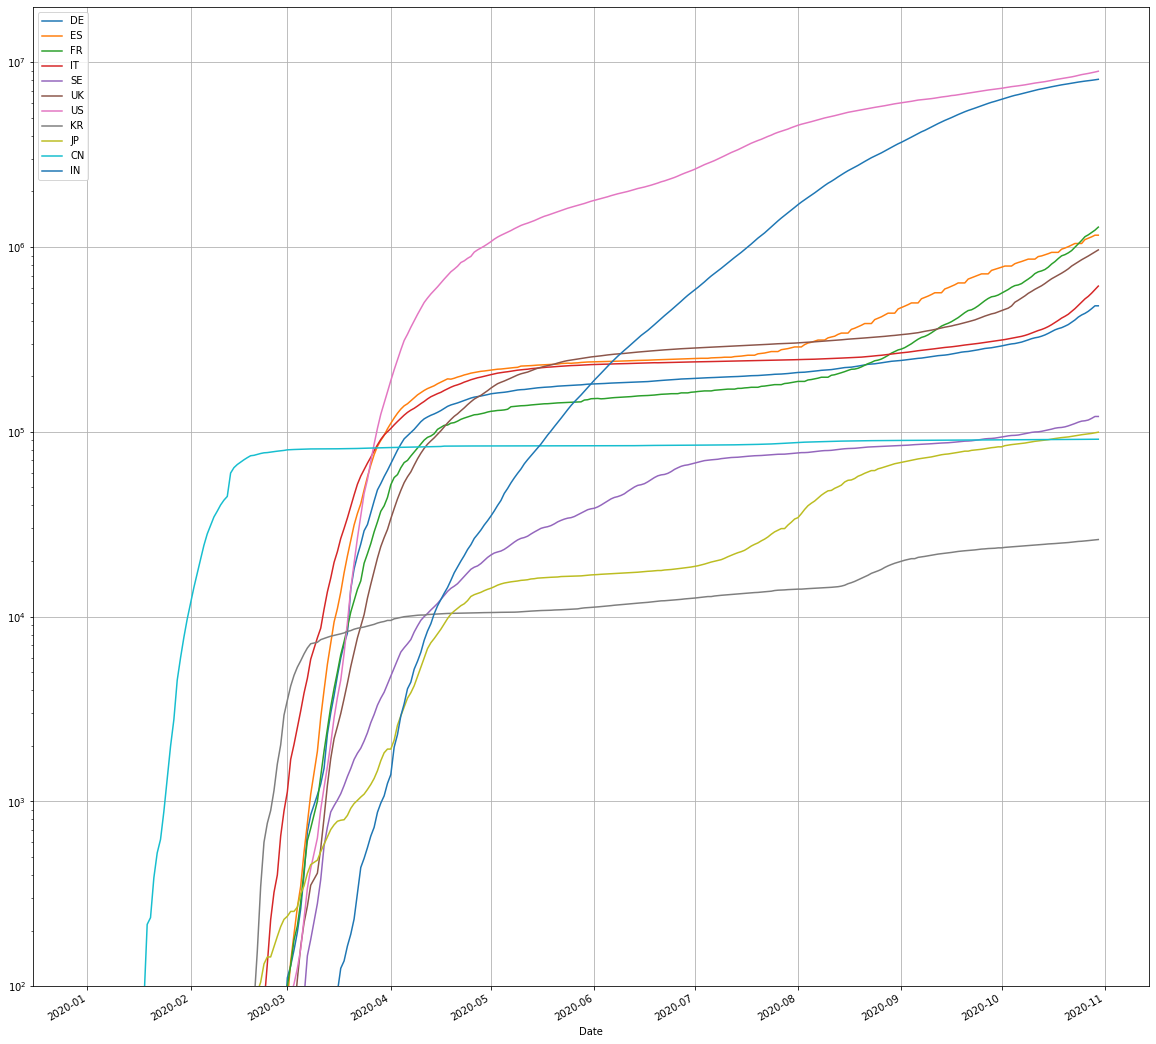

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

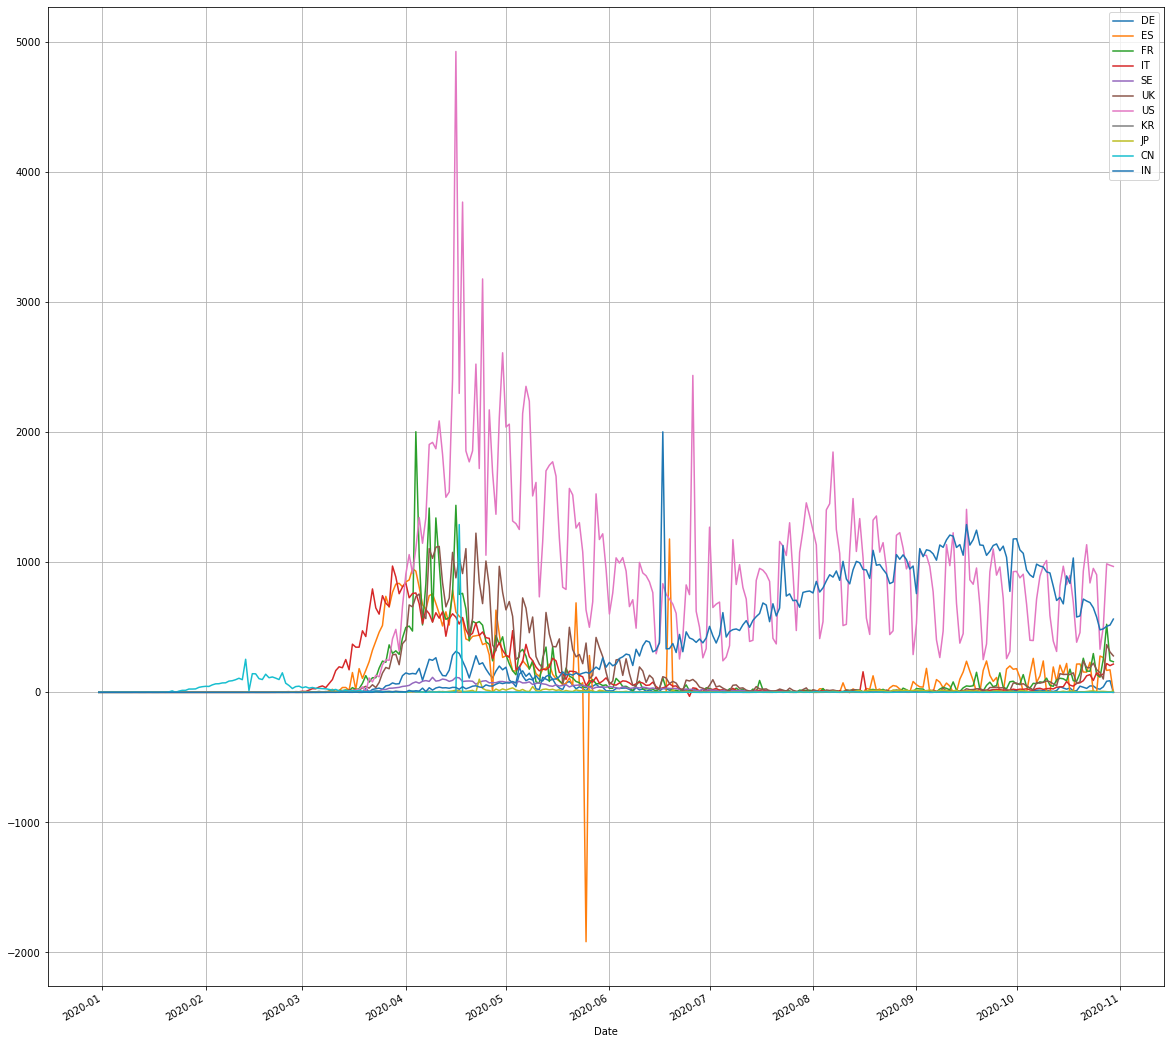

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

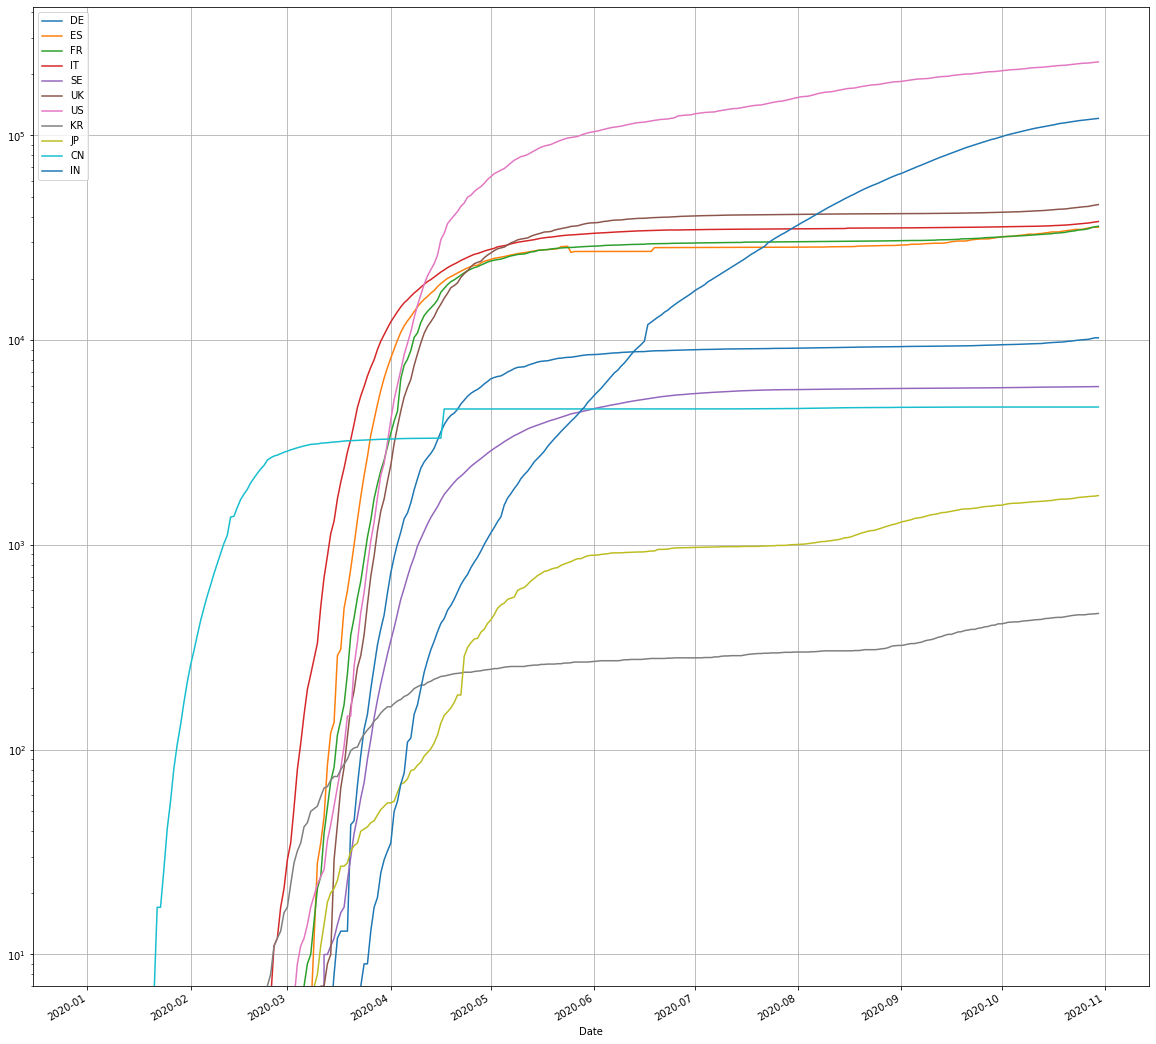

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-10-16,7334.0,15186.0,30621,8803,902,18978,63785,47,721,36,63371
12,2020-10-17,7830.0,0.0,25086,10009,1180,15635,70256,73,632,20,62212
11,2020-10-18,5587.0,0.0,32427,10925,697,16171,56611,91,593,30,61871
10,2020-10-19,4325.0,37889.0,29837,11705,321,16981,47843,76,471,17,55722
9,2020-10-20,6868.0,13873.0,13243,9337,770,18803,60160,58,353,34,46790
8,2020-10-21,7595.0,16973.0,20468,10871,1291,21330,58549,91,453,16,54044
7,2020-10-22,11287.0,20986.0,26676,15199,1573,26687,62978,119,591,22,55839
6,2020-10-23,11242.0,19851.0,41622,16078,1667,21238,72058,155,614,29,54366
5,2020-10-24,14714.0,0.0,42032,19143,1870,20531,85329,77,697,33,53370
4,2020-10-25,11176.0,0.0,45422,19640,1478,23012,83056,61,699,19,50129


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-10-16,348502.0,936127.0,809274.0,380110.0,103450.0,673562.0,7979764.0,24787.0,91398.0,90860.0,7370468.0
2020-10-17,356332.0,936127.0,834360.0,390119.0,104630.0,689197.0,8050020.0,24860.0,92030.0,90880.0,7432680.0
2020-10-18,361919.0,936127.0,866787.0,401044.0,105327.0,705368.0,8106631.0,24951.0,92623.0,90910.0,7494551.0
2020-10-19,366244.0,974016.0,896624.0,412749.0,105648.0,722349.0,8154474.0,25027.0,93094.0,90927.0,7550273.0
2020-10-20,373112.0,987889.0,909867.0,422086.0,106418.0,741152.0,8214634.0,25085.0,93447.0,90961.0,7597063.0
2020-10-21,380707.0,1004862.0,930335.0,432957.0,107709.0,762482.0,8273183.0,25176.0,93900.0,90977.0,7651107.0
2020-10-22,391994.0,1025848.0,957011.0,448156.0,109282.0,789169.0,8336161.0,25295.0,94491.0,90999.0,7706946.0
2020-10-23,403236.0,1045699.0,998633.0,464234.0,110949.0,810407.0,8408219.0,25450.0,95105.0,91028.0,7761312.0
2020-10-24,417950.0,1045699.0,1040665.0,483377.0,112819.0,830938.0,8493548.0,25527.0,95802.0,91061.0,7814682.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-10-16,24.0,222.0,88,83,3,138,828,2,4,0,895
12,2020-10-17,33.0,0.0,178,55,2,136,899,2,11,0,837
11,2020-10-18,10.0,0.0,89,47,2,150,690,1,9,0,1033
10,2020-10-19,12.0,217.0,85,69,1,67,385,0,4,0,579
9,2020-10-20,47.0,218.0,146,73,3,80,459,3,2,0,587
8,2020-10-21,39.0,156.0,262,89,3,241,933,3,3,0,717
7,2020-10-22,30.0,155.0,163,127,2,191,1135,3,6,0,702
6,2020-10-23,49.0,231.0,162,136,6,189,841,2,9,0,690
5,2020-10-24,49.0,0.0,298,91,2,224,953,2,12,0,650
4,2020-10-25,29.0,0.0,137,151,3,174,904,0,5,0,578


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-10-16,9734.0,33775.0,33116.0,36239.0,5903.0,43293.0,217696.0,440.0,1649.0,4716.0,112161.0
2020-10-17,9767.0,33775.0,33294.0,36294.0,5905.0,43429.0,218595.0,442.0,1660.0,4716.0,112998.0
2020-10-18,9777.0,33775.0,33383.0,36341.0,5907.0,43579.0,219285.0,443.0,1669.0,4716.0,114031.0
2020-10-19,9789.0,33992.0,33468.0,36410.0,5908.0,43646.0,219670.0,443.0,1673.0,4716.0,114610.0
2020-10-20,9836.0,34210.0,33614.0,36483.0,5911.0,43726.0,220129.0,446.0,1675.0,4716.0,115197.0
2020-10-21,9875.0,34366.0,33876.0,36572.0,5914.0,43967.0,221062.0,449.0,1678.0,4716.0,115914.0
2020-10-22,9905.0,34521.0,34039.0,36699.0,5916.0,44158.0,222197.0,452.0,1684.0,4716.0,116616.0
2020-10-23,9954.0,34752.0,34201.0,36835.0,5922.0,44347.0,223038.0,454.0,1693.0,4716.0,117306.0
2020-10-24,10003.0,34752.0,34499.0,36926.0,5924.0,44571.0,223991.0,456.0,1705.0,4716.0,117956.0
